<a href="https://colab.research.google.com/github/chiyanglin-AStar/science_coding/blob/main/ising_annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ising model

The Ising model is a mathematical model in statistical mechanics that describes the behavior of magnetic spins in a lattice structure. It was introduced by the physicist Ernst Ising in 1925 as a one-dimensional model, and later extended to higher dimensions. The Ising model is widely used to study phase transitions and critical phenomena in statistical physics.

The basic elements of the Ising model are as follows:

### Spin System:

The system is represented by a lattice of discrete sites, each of which can have an associated "spin." The spins are often modeled as binary variables, taking values +1 or -1.

### Hamiltonian:

The energy of the system is described by a Hamiltonian, which is a mathematical function that depends on the configuration of spins. The Hamiltonian for the Ising model is typically expressed as the sum of interactions between neighboring spins.

### Interaction Energy:

The interaction energy between neighboring spins tends to align the spins when it is favorable (lower energy) and tends to misalign them when it is unfavorable (higher energy).

### Temperature:

The temperature of the system plays a crucial role. At higher temperatures, thermal fluctuations are more pronounced, and spins are more likely to be in random orientations. At lower temperatures, spins tend to align to minimize energy.
The Ising model undergoes a phase transition at a critical temperature. Below this temperature, the system exhibits spontaneous magnetization, meaning that a large fraction of the spins align to produce a macroscopic magnetic moment. Above this temperature, the system is in a disordered phase with no spontaneous magnetization.

Below is a simple Python implementation of the Ising model using the Metropolis algorithm for a 2D square lattice. This example uses a simplified version without considering external magnetic fields.

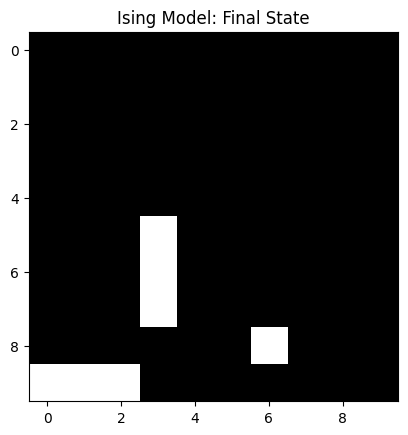

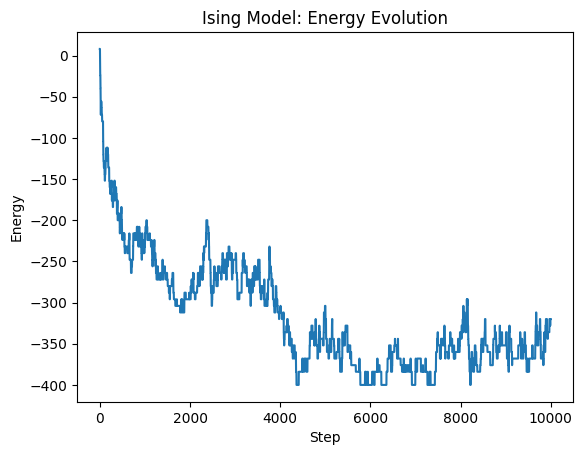

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_lattice(size):
    return np.random.choice([-1, 1], size=(size, size))

def calculate_energy(lattice):
    neighbors_sum = np.roll(lattice, 1, axis=0) + np.roll(lattice, -1, axis=0) + \
                    np.roll(lattice, 1, axis=1) + np.roll(lattice, -1, axis=1)
    return -np.sum(lattice * neighbors_sum)

def metropolis_update(lattice, temperature):
    i, j = np.random.randint(0, lattice.shape[0]), np.random.randint(0, lattice.shape[1])
    spin = lattice[i, j]

    neighbors_sum = lattice[(i + 1) % lattice.shape[0], j] + lattice[(i - 1) % lattice.shape[0], j] + \
                    lattice[i, (j + 1) % lattice.shape[1]] + lattice[i, (j - 1) % lattice.shape[1]]

    delta_energy = 2 * spin * neighbors_sum

    if delta_energy < 0 or np.random.rand() < np.exp(-delta_energy / temperature):
        lattice[i, j] *= -1

def simulate_ising_model(size, temperature, num_steps):
    lattice = initialize_lattice(size)
    energies = []

    for step in range(num_steps):
        metropolis_update(lattice, temperature)
        energy = calculate_energy(lattice)
        energies.append(energy)

    return lattice, energies

# Example usage:
size = 10
temperature = 2.0
num_steps = 10000

final_lattice, energy_history = simulate_ising_model(size, temperature, num_steps)

# Plot the final state of the lattice
plt.imshow(final_lattice, cmap='binary', vmin=-1, vmax=1)
plt.title('Ising Model: Final State')
plt.show()

# Plot the energy history
plt.plot(energy_history)
plt.xlabel('Step')
plt.ylabel('Energy')
plt.title('Ising Model: Energy Evolution')
plt.show()

This code initializes a random spin configuration on a 2D lattice, then iteratively applies Metropolis updates to simulate the evolution of the system at a given temperature. The resulting lattice and energy evolution are visualized using Matplotlib. Feel free to experiment with different lattice sizes, temperatures, and numbers of simulation steps to observe the behavior of the Ising mode

## Annealing

Annealing, in the context of materials science and metallurgy, refers to a heat treatment process where a material, typically a metal or alloy, is heated to a specific temperature and then cooled at a controlled rate. The objective of annealing is to modify the physical and sometimes chemical properties of the material, such as its hardness, strength, and ductility.

Annealing typically involves the following stages:


### Heating:

The material is heated to a specific temperature, known as the annealing temperature. The temperature is carefully chosen based on the material's composition and desired properties. The heating process allows the material's crystal structure to become more uniform and mobile.

### Holding:

After reaching the annealing temperature, the material is held at that temperature for a certain duration. This holding period allows for the redistribution of atoms within the material, helping to eliminate defects, dislocations, and stresses.

### Cooling:

The material is then slowly cooled at a controlled rate. The slow cooling rate is critical to avoid the introduction of new defects or stresses. The controlled cooling allows the atoms to arrange themselves in a more ordered and stable manner, leading to improved mechanical and thermal properties.
Annealing is commonly used to achieve the following effects:

Softening: Annealing can reduce the hardness of a material, making it more malleable and easier to machine or form.

Stress Relief: Annealing helps relieve internal stresses within the material, which may have accumulated during manufacturing processes.

Recrystallization: The heating and slow cooling promote the formation of new, smaller crystals, reducing grain boundaries and improving overall structural uniformity.

Apart from metallurgy, the term "annealing" is also used in the field of optimization algorithms, particularly in simulated annealing. Simulated annealing is a probabilistic optimization technique inspired by the annealing process in metallurgy. In this context, it is used to find approximate solutions to combinatorial optimization problems by mimicking the annealing process of metals. The algorithm starts with a high temperature, allowing for exploration of the solution space, and gradually decreases the temperature to focus on refining the solution. This process helps avoid being trapped in local minima and find globally optimal solutions.

Simulated annealing is a popular optimization algorithm inspired by the annealing process in metallurgy. We can adapt the Ising model to demonstrate the simulated annealing process in Python. In this example, we'll consider a simple one-dimensional Ising model and use simulated annealing to find the ground state (lowest energy state) configuration.

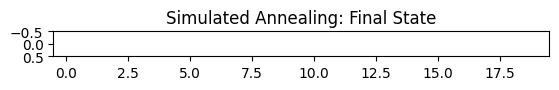

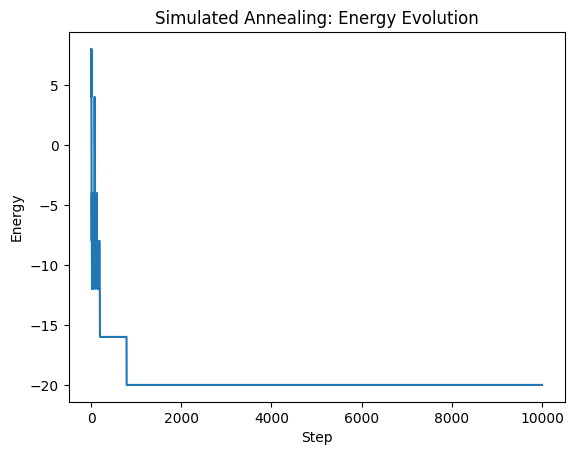

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_lattice(size):
    return np.random.choice([-1, 1], size=size)

def calculate_energy(lattice):
    return -np.sum(lattice * np.roll(lattice, 1))

def metropolis_update(lattice, temperature):
    i = np.random.randint(0, lattice.shape[0])
    spin = lattice[i]

    delta_energy = 2 * spin * (lattice[(i + 1) % lattice.shape[0]] + lattice[(i - 1) % lattice.shape[0]])

    if delta_energy < 0 or np.random.rand() < np.exp(-delta_energy / temperature):
        lattice[i] *= -1

def simulated_annealing(size, initial_temperature, cooling_rate, num_steps):
    lattice = initialize_lattice(size)
    energy_history = []

    temperature = initial_temperature

    for step in range(num_steps):
        metropolis_update(lattice, temperature)
        energy = calculate_energy(lattice)
        energy_history.append(energy)

        # Annealing schedule: reduce temperature
        temperature *= cooling_rate

    return lattice, energy_history

# Example usage:
size = 20
initial_temperature = 5.0
cooling_rate = 0.99
num_steps = 10000

final_lattice, energy_history = simulated_annealing(size, initial_temperature, cooling_rate, num_steps)

# Plot the final state of the lattice
plt.imshow(final_lattice.reshape(1, -1), cmap='binary', vmin=-1, vmax=1)
plt.title('Simulated Annealing: Final State')
plt.show()

# Plot the energy history
plt.plot(energy_history)
plt.xlabel('Step')
plt.ylabel('Energy')
plt.title('Simulated Annealing: Energy Evolution')
plt.show()

In this example, the Ising model represents a one-dimensional chain of spins. The simulated annealing algorithm updates the spin configurations based on the Metropolis algorithm and gradually decreases the temperature over the specified number of steps. The final state of the lattice and the energy evolution during the annealing process are visualized.

Feel free to experiment with different parameters such as size, initial_temperature, cooling_rate, and num_steps to observe how the simulated annealing process influences the final state and energy of the Ising model.